<a href="https://colab.research.google.com/github/Nsimaar99/Nsima-Project/blob/master/Copy_of_AIPND_image_classifier_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AI Programming with Python Nanodegree: Image Classifier Project
  - Do not make changes to the first 2 code cells, they are being used for setting up the `flowers` dataset and `cat_to_name.json`. Start writing code from third code cell onwards.
  - To use this notebook: `File > Save a copy in Drive`
  

### Code Explanation:

- **Setting Up Flower Dataset:**
  - `data_dir = './flowers'`: Defines the directory path for the flower dataset.
  - `FLOWERS_DIR = Path(data_dir)`: Uses `Path` from `pathlib` for handling PosixPath.

- **Downloading and Extracting Dataset:**
  - `if not FLOWERS_DIR.is_dir()`: Checks if the dataset directory exists.
    - `FLOWERS_DIR.mkdir(parents=True, exist_ok=True)`: Creates the directory if not present.
  - `TARBALL = FLOWERS_DIR / "flower_data.tar.gz"`: Defines the tarball path.
  - Downloads and extracts the dataset if not already present:
    - `request = requests.get(...)`: Downloads the 'flower_data.tar.gz' file.
    - `with open(TARBALL, "wb") as file_ref`: Writes the downloaded content to the tarball.
    - `with tarfile.open(TARBALL, "r") as tar_ref`: Extracts the tarball contents to the dataset directory.

- **Cleaning Up:**
  - `os.remove(TARBALL)`: Deletes the downloaded tarball to save space.

- **Status Messages:**
  - Prints informative messages about the directory creation, download, extraction, and cleanup.


In [ ]:
# imports
import os
import requests
from pathlib import Path
import tarfile

# defining dataset directory
data_dir = './flowers'

# using pathlib.Path for handling PosixPath
FLOWERS_DIR = Path(data_dir)

# downloading and setting up data if not already present
if not FLOWERS_DIR.is_dir():
    # creating directory
    FLOWERS_DIR.mkdir(parents=True, exist_ok=True)
    print(f"[INFO] Directory created: ./{FLOWERS_DIR}")

    print() # for readability

    # tarball path
    TARBALL = FLOWERS_DIR / "flower_data.tar.gz"

    # downloading and writing the tarball to './flowers' directory
    print(f"[INFO] Downloading the file 'flower_data.tar.gz' to ./{FLOWERS_DIR}")
    request = requests.get('https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz')
    with open(TARBALL, "wb") as file_ref:
        file_ref.write(request.content)
        print(f"[INFO] 'flower_data.tar.gz' saved to ./{FLOWERS_DIR}")

    print() # for readability

    # extracting the downloaded tarball
    print(f"[INFO] Extracting the downloaded tarball to ./{FLOWERS_DIR}")
    with tarfile.open(TARBALL, "r") as tar_ref:
        tar_ref.extractall(FLOWERS_DIR)
        print(f"[INFO] 'flower_data.tar.gz' extracted successfully to ./{FLOWERS_DIR}")

    print() # for readability

    # using os.remove to delete the downloaded tarball
    print("[INFO] Deleting the tarball to save space.")
    os.remove(TARBALL)
else:
    print(f"[INFO] Dataset already setup at ./{FLOWERS_DIR}")

[INFO] Directory created: ./flowers

[INFO] Downloading the file 'flower_data.tar.gz' to ./flowers
[INFO] 'flower_data.tar.gz' saved to ./flowers

[INFO] Extracting the downloaded tarball to ./flowers
[INFO] 'flower_data.tar.gz' extracted successfully to ./flowers

[INFO] Deleting the tarball to save space.


### Code Explanation:

- **Creating a JSON File for Flower Categories:**
  - `data`: Defines a dictionary containing numerical keys and corresponding flower names.
  - `with open('cat_to_name.json', 'w') as file`: Opens the file 'cat_to_name.json' for writing.
  - `json.dump(data, file)`: Writes the dictionary data to the JSON file.

- **Interpreting the Output:**
  - The code creates a JSON file named 'cat_to_name.json' that serves as a mapping between numerical keys and flower names. This mapping can be useful for associating numerical labels with human-readable names in machine learning tasks.


In [ ]:
import json

data = {
    "21": "fire lily", "3": "canterbury bells", "45": "bolero deep blue", "1": "pink primrose", "34": "mexican aster",
    "27": "prince of wales feathers", "7": "moon orchid", "16": "globe-flower", "25": "grape hyacinth", "26": "corn poppy",
    "79": "toad lily", "39": "siam tulip", "24": "red ginger", "67": "spring crocus", "35": "alpine sea holly",
    "32": "garden phlox", "10": "globe thistle", "6": "tiger lily", "93": "ball moss", "33": "love in the mist",
    "9": "monkshood", "102": "blackberry lily", "14": "spear thistle", "19": "balloon flower", "100": "blanket flower",
    "13": "king protea", "49": "oxeye daisy", "15": "yellow iris", "61": "cautleya spicata", "31": "carnation",
    "64": "silverbush", "68": "bearded iris", "63": "black-eyed susan", "69": "windflower", "62": "japanese anemone",
    "20": "giant white arum lily", "38": "great masterwort", "4": "sweet pea", "86": "tree mallow",
    "101": "trumpet creeper", "42": "daffodil", "22": "pincushion flower", "2": "hard-leaved pocket orchid",
    "54": "sunflower", "66": "osteospermum", "70": "tree poppy", "85": "desert-rose", "99": "bromelia", "87": "magnolia",
    "5": "english marigold", "92": "bee balm", "28": "stemless gentian", "97": "mallow", "57": "gaura",
    "40": "lenten rose", "47": "marigold", "59": "orange dahlia", "48": "buttercup", "55": "pelargonium",
    "36": "ruby-lipped cattleya", "91": "hippeastrum", "29": "artichoke", "71": "gazania", "90": "canna lily",
    "18": "peruvian lily", "98": "mexican petunia", "8": "bird of paradise", "30": "sweet william",
    "17": "purple coneflower", "52": "wild pansy", "84": "columbine", "12": "colt's foot", "11": "snapdragon",
    "96": "camellia", "23": "fritillary", "50": "common dandelion", "44": "poinsettia", "53": "primula",
    "72": "azalea", "65": "californian poppy", "80": "anthurium", "76": "morning glory", "37": "cape flower",
    "56": "bishop of llandaff", "60": "pink-yellow dahlia", "82": "clematis", "58": "geranium", "75": "thorn apple",
    "41": "barbeton daisy", "95": "bougainvillea", "43": "sword lily", "83": "hibiscus", "78": "lotus lotus",
    "88": "cyclamen", "94": "foxglove", "81": "frangipani", "74": "rose", "89": "watercress", "73": "water lily",
    "46": "wallflower", "77": "passion flower", "51": "petunia"
}

with open('cat_to_name.json', 'w') as file:
    json.dump(data, file)

In [ ]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms, models
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import json
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
from collections import OrderedDict
import pandas as pd
import os
import seaborn as sns

In [ ]:
data_dir = 'flowers'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

In [ ]:
import os

# List files in the 'train' directory
train_dir = './flowers/train'
class_folders = os.listdir(train_dir)

# Print paths of some image files
for class_folder in class_folders:
    image_files = os.listdir(os.path.join(train_dir, class_folder))
    print(f"Images in class {class_folder}:")
    for image_file in image_files[:5]:  # Show first 5 images for example
        print(os.path.join(train_dir, class_folder, image_file))

Images in class 85:
./flowers/train/85/image_04820.jpg
./flowers/train/85/image_04774.jpg
./flowers/train/85/image_04812.jpg
./flowers/train/85/image_04777.jpg
./flowers/train/85/image_04768.jpg
Images in class 10:
./flowers/train/10/image_07097.jpg
./flowers/train/10/image_08097.jpg
./flowers/train/10/image_07111.jpg
./flowers/train/10/image_08092.jpg
./flowers/train/10/image_07116.jpg
Images in class 16:
./flowers/train/16/image_06677.jpg
./flowers/train/16/image_06680.jpg
./flowers/train/16/image_06664.jpg
./flowers/train/16/image_06690.jpg
./flowers/train/16/image_06669.jpg
Images in class 5:
./flowers/train/5/image_05190.jpg
./flowers/train/5/image_05204.jpg
./flowers/train/5/image_05157.jpg
./flowers/train/5/image_05180.jpg
./flowers/train/5/image_05197.jpg
Images in class 11:
./flowers/train/11/image_03148.jpg
./flowers/train/11/image_03120.jpg
./flowers/train/11/image_03135.jpg
./flowers/train/11/image_03154.jpg
./flowers/train/11/image_03171.jpg
Images in class 99:
./flowers/t

In [ ]:
# TODO: Define your transforms for the training, validation, and testing sets
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomRotation(30),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),

    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),

    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# TODO: Load the datasets with ImageFolder
image_datasets = {
    'train': datasets.ImageFolder(train_dir, transform=data_transforms['train']),
    'valid': datasets.ImageFolder(valid_dir, transform=data_transforms['valid']),
    'test': datasets.ImageFolder(test_dir, transform=data_transforms['test']),
}

# TODO: Using the image datasets and the transforms, define the dataloaders
dataloaders = {
    'train': DataLoader(image_datasets['train'], batch_size=64, shuffle=True),
    'valid': DataLoader(image_datasets['valid'], batch_size=64, shuffle=False),
    'test': DataLoader(image_datasets['test'], batch_size=64, shuffle=False)
}

# Now you can access the number of classes
num_classes = len(image_datasets['train'].class_to_idx)

print(f"The dataset has {num_classes} classes.")

The dataset has 102 classes.


In [ ]:
# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [ ]:
# Load a pre-trained VGG16 model
model = models.vgg16(pretrained=True)

# Freeze the feature parameters so we don't backpropagate through them
for param in model.parameters():
    param.requires_grad = False

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 175MB/s]


In [ ]:
# Define a new classifier
new_classifier = nn.Sequential(
    nn.Linear(in_features=25088, out_features=4096),  # Input size based on VGG16 architecture
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.5),
    nn.Linear(in_features=4096, out_features=4096),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.5),
    nn.Linear(in_features=4096, out_features=102)  # 102 output classes for your dataset
)

# Replace the pre-trained classifier with the new one
model.classifier = new_classifier

In [ ]:
# Move model to device
try:
    model.to(device)
except RuntimeError as e:
    print(f"Error moving model to device: {e}")

# Define the criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.003)

# Print the model to verify
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
# TODO: Do validation on the test set
## Training the loop
epochs = 5
steps = 0
running_loss = 0
print_every = 20

# Use dataloaders['train'] and dataloaders['test'] here
for epoch in range(epochs):
    for inputs, labels in dataloaders['train']:  # Use dataloaders['train']
        steps += 1
        # Moving input and label tensors to the default device
        inputs, labels = inputs.to(device), labels.type(torch.long).to(device)

        optimizer.zero_grad()
        # Forward pass
        logps = model(inputs)
        loss = criterion(logps, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if steps % print_every == 0:
            model.eval()
            test_loss = 0
            accuracy = 0
            # Use dataloaders['test'] here
            for inputs, labels in dataloaders['test']:  # Use dataloaders['test']
                inputs, labels = inputs.to(device), labels.to(device)  # Move to device
                logps = model(inputs)
                loss = criterion(logps, labels)
                test_loss += loss.item()

                # Calculate accuracy
                ps = torch.exp(logps)
                top_p, top_class = ps.topk(1, dim=1)
                equality = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equality.type(torch.FloatTensor))

            print(f"Epoch {epoch+1}/{epochs}.."
                  f"Train loss: {running_loss/print_every:.3f}.."
                  f"Test loss: {test_loss/len(dataloaders['test']):.3f}.."
                  f"Test accuracy: {accuracy/len(dataloaders['test']):.3f}..")
            running_loss = 0
            model.train()


Epoch 1/5..Train loss: 11.388..Test loss: 4.348..Test accuracy: 0.076..
Epoch 1/5..Train loss: 4.617..Test loss: 4.276..Test accuracy: 0.129..
Epoch 1/5..Train loss: 4.709..Test loss: 4.253..Test accuracy: 0.089..
Epoch 1/5..Train loss: 4.610..Test loss: 4.344..Test accuracy: 0.077..
Epoch 1/5..Train loss: 4.612..Test loss: 4.205..Test accuracy: 0.084..
Epoch 2/5..Train loss: 4.534..Test loss: 4.454..Test accuracy: 0.084..
Epoch 2/5..Train loss: 4.586..Test loss: 4.382..Test accuracy: 0.060..
Epoch 2/5..Train loss: 4.569..Test loss: 4.450..Test accuracy: 0.075..
Epoch 2/5..Train loss: 4.543..Test loss: 4.420..Test accuracy: 0.061..
Epoch 2/5..Train loss: 4.620..Test loss: 4.463..Test accuracy: 0.053..
Epoch 3/5..Train loss: 4.561..Test loss: 4.525..Test accuracy: 0.060..
Epoch 3/5..Train loss: 4.618..Test loss: 4.432..Test accuracy: 0.052..
Epoch 3/5..Train loss: 4.521..Test loss: 4.391..Test accuracy: 0.062..
Epoch 3/5..Train loss: 4.542..Test loss: 4.396..Test accuracy: 0.061..
Epoch

In [ ]:
# Attach class-to-index mapping to the model
model.class_to_idx = image_datasets['train'].class_to_idx

# Save checkpoint
checkpoint = {
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'class_to_idx': model.class_to_idx,
    'epoch': epoch,
    'model_arch': 'vgg16'
}

# Save the checkpoint to a file
torch.save(checkpoint, 'model_checkpoint.pth')

print("Checkpoint saved successfully!")

Checkpoint saved successfully!


In [ ]:
def load_checkpoint(filepath):
    # Load the saved checkpoint
    checkpoint = torch.load(filepath)

    # Rebuild the model architecture from the checkpoint
    # In this case, the architecture is 'vgg16'
    if checkpoint['model_arch'] == 'vgg16':
        model = models.vgg16(pretrained=True)

        # Define a new classifier with the correct output size
        new_classifier = nn.Sequential(
            nn.Linear(in_features=25088, out_features=4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=4096, out_features=102)  # Match the output size from the checkpoint
        )

        # Replace the pre-trained classifier with the new one
        model.classifier = new_classifier

    else:
        raise ValueError(f"Model architecture {checkpoint['model_arch']} is not recognized")

    # Load the model state from the checkpoint
    model.load_state_dict(checkpoint['model_state_dict'])

    # Move the model to the appropriate device (CPU/GPU)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Rebuild the optimizer (use the same parameters as during training)
    optimizer = torch.optim.Adam(model.classifier.parameters())  # Only load classifier parameters
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

    # Load class-to-index mapping
    model.class_to_idx = checkpoint['class_to_idx']

    # Load the epoch number
    epoch = checkpoint['epoch']

    print(f"Checkpoint loaded successfully from {filepath}. Model is on {device}.")

    return model, optimizer, epoch

filepath = 'model_checkpoint.pth'  # Filepath of the saved checkpoint
model, optimizer, start_epoch = load_checkpoint(filepath)

print(f"Model loaded and ready to continue training from epoch {start_epoch}")

<ipython-input-13-c4515ce7c492>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(filepath)


Checkpoint loaded successfully from model_checkpoint.pth. Model is on cuda.
Model loaded and ready to continue training from epoch 4


In [ ]:
import requests

# Download the image of a flower (replace with a valid flower image URL)
url = 'https://images.pexels.com/photos/56866/garden-rose-red-pink-56866.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1'  # Replace with an actual flower image URL
response = requests.get(url, stream=True)  # Added stream=True to handle large files efficiently
response.raise_for_status()  # Raise an exception if the request was unsuccessful

# Save the downloaded image as 'downloaded_image.jpg'
with open('downloaded_image.jpg', 'wb') as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)

print("Flower image downloaded successfully!")

Flower image downloaded successfully!


Flower image downloaded successfully!


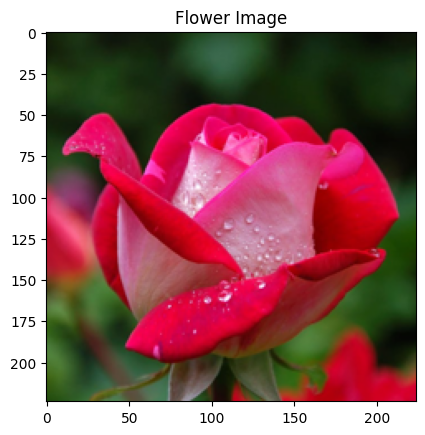

In [ ]:
# Download the image of a flower
url = 'https://images.pexels.com/photos/56866/garden-rose-red-pink-56866.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1'  # Flower image URL
response = requests.get(url, stream=True)
response.raise_for_status()

# Save the downloaded image as 'downloaded_image.jpg'
with open('downloaded_image.jpg', 'wb') as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)

print("Flower image downloaded successfully!")

# Process the image
def process_image(image_path):
    pil_image = Image.open(image_path).convert('RGB')  # Ensure image is in RGB mode

    # Resize the image
    aspect_ratio = pil_image.width / pil_image.height
    if pil_image.width < pil_image.height:
        new_size = (256, int(256 / aspect_ratio))
    else:
        new_size = (int(256 * aspect_ratio), 256)
    pil_image = pil_image.resize(new_size)

    # Center crop to 224x224
    left = (pil_image.width - 224) / 2
    top = (pil_image.height - 224) / 2
    right = left + 224
    bottom = top + 224
    pil_image = pil_image.crop((left, top, right, bottom))

    # Convert to NumPy array and normalize
    np_image = np.array(pil_image) / 255.0
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    np_image = (np_image - mean) / std
    np_image = np_image.transpose((2, 0, 1))

    return torch.tensor(np_image)

# Display the processed image
def imshow(image, ax=None, title=None):
    if ax is None:
        fig, ax = plt.subplots()

    # PyTorch tensors assume the color channel is the first dimension
    image = image.numpy().transpose((1, 2, 0))

    # Undo normalization
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    image = np.clip(image, 0, 1)

    ax.imshow(image)
    if title:
        ax.set_title(title)
    plt.show()

# Process and display the image of the flower
image_path = 'downloaded_image.jpg'  # Change to .jpg to match the downloaded file format
processed_image = process_image(image_path)
imshow(processed_image, title="Flower Image")

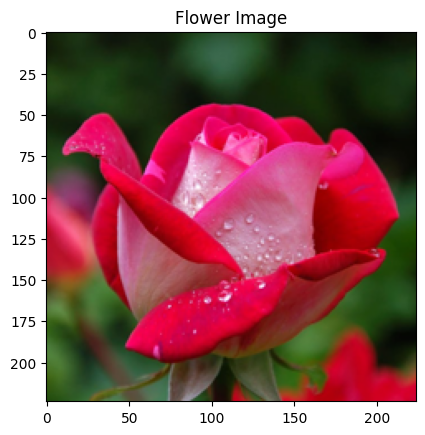

In [ ]:
def imshow(image, ax=None, title=None):
    if ax is None:
        fig, ax = plt.subplots()

    # Convert tensor to numpy
    image = image.numpy().transpose((1, 2, 0))

    # Denormalize
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    image = np.clip(image, 0, 1)

    ax.imshow(image)
    if title:
        ax.set_title(title)
    plt.show()

image_path = 'downloaded_image.jpg'
processed_image = process_image(image_path)
imshow(processed_image, title="Flower Image")

In [ ]:
# Load a pre-trained VGG16 model
model = models.vgg16(pretrained=False)

# Define a new classifier (ensure that the output size matches the number of classes)
new_classifier = nn.Sequential(
    nn.Linear(in_features=25088, out_features=4096),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.5),
    nn.Linear(in_features=4096, out_features=4096),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.5),
    nn.Linear(in_features=4096, out_features=102)  # Assuming 102 classes
)

# Replace the model's classifier
model.classifier = new_classifier

# Load the checkpoint
checkpoint = torch.load('model_checkpoint.pth')  # Ensure the path is correct
model.load_state_dict(checkpoint['model_state_dict'])

# Ensure class_to_idx is available in the checkpoint
class_to_idx = checkpoint['class_to_idx']  # Assuming this was saved in your checkpoint

NameError: name 'models' is not defined

In [ ]:

def predict(image_path, model, class_to_idx, topk=5):
    ''' Predict the top K classes of an image using a trained deep learning model.
    Args:
        image_path (str): Path to the input image.
        model (torch.nn.Module): Trained model for inference.
        class_to_idx (dict): Dictionary mapping class indices to labels.
        topk (int): Number of top predictions to return.
    Returns:
        top_probs (torch.Tensor): Top K probabilities.
        top_classes (list): Corresponding class labels for the top K predictions.
    '''
    # Step 1: Process the image
    image = process_image(image_path)

    # Step 2: Add a batch dimension
    image = image.unsqueeze(0)

    # Step 3: Move the image and model to the appropriate device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    image = image.to(device)

    # Step 4: Set the model to evaluation mode and make predictions
    model.eval()
    with torch.no_grad():
        output = model(image)

    # Step 5: Apply softmax to get probabilities
    probabilities = F.softmax(output, dim=1)

    # Step 6: Get the top K probabilities and corresponding indices
    top_probs, top_indices = probabilities.topk(topk, dim=1)
    top_probs = top_probs.cpu().numpy()[0]  # Convert to NumPy for easier handling
    top_indices = top_indices.cpu().numpy()[0]  # Convert to NumPy

    # Step 7: Map indices to class labels
    idx_to_class = {val: key for key, val in class_to_idx.items()}
    top_classes = [idx_to_class[i] for i in top_indices]

    return top_probs, top_classes

# Set the path to the image file
image_path = 'downloaded_image.jpg'  # Change this to your actual image path if different

# Call the predict function
probs, classes = predict(image_path, model, class_to_idx, topk=5)

# Print the top probabilities and class labels
print(probs)  # e.g., [0.01558163, 0.01541934, 0.01452626, 0.01443549, 0.01407339]
print(classes)  # e.g., ['70', '3', '45', '62', '56']

NameError: name 'model' is not defined